# Celeste Tutorial
## Orbital Visualization Examples and Practice for the Celeste Julia Package

Reference wiki [here](https://audacy.space:8443/display/ENGI/The+Celeste+Package)

### 0. Run this cell first to load Celeste and PyPlot packages:

In [1]:
using Celeste, PyPlot

Qt: Untested Windows version 10.0 detected!


### 1. Getting started
Running the `system()` function with no arguments tells it to use the default settings (look in the wiki for exact defaults): the simulation starts *now* and runs for 1 day with 500 steps. The Earth is the only object in the simulation, and the result is plotted in Earth-centered inertial (ECI) coordinates.

**N.B.** The `print()` line merely suppresses the output of the `system()` function so that only the plot is shown below the cell.

/Users/jamesspicer/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x31c0e05d0>)

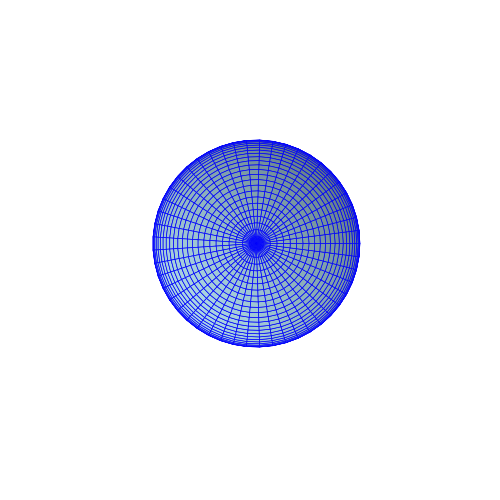

In [3]:
system()
print()

### 2. Custom simulation time

The simulation start and end times (both in UTC) can be specified using Julia's [`DateTime`](http://docs.julialang.org/en/release-0.4/manual/dates/) format. 
The resolution of the simulation can be added by specifying either the number of timesteps in the simulation or the length of each timestep (in seconds).

For example, let's start a simulation on April 19<sup>th</sup>, 2016 at 9:54 am UTC and end it on June 12<sup>th</sup>, 2017 at 5:12:03.592 pm UTC. Let's specify timesteps of 3 days. As we haven't added any objects yet, the default plot will remain the same. 

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x31561b050>)

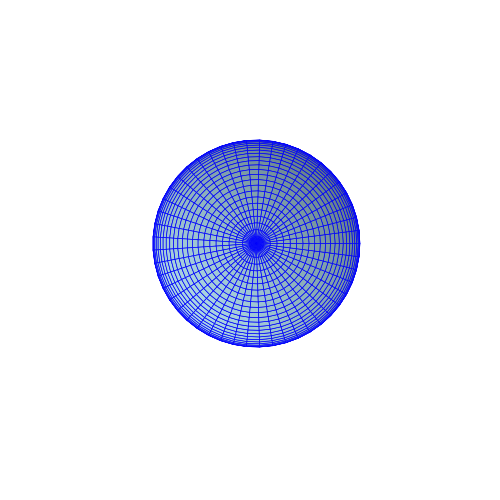

In [4]:
ti = DateTime(2016, 4, 19, 9, 54)
tf = DateTime(2017, 6, 12, 17, 12, 03, 592)
timeStep = 60*60*24*3
system(ti=ti, tf=tf, timeStep=timeStep)
print()

### 3. Adding celestial bodies
By default, only Earth is shown in the simulation, but we can add Earth's Moon, planets (except Pluto), and the sun by adding their names to the `bodies` (default `["Earth"]`) array.
Let's look at the Moon's orbit over two weeks:

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x320397e50>)

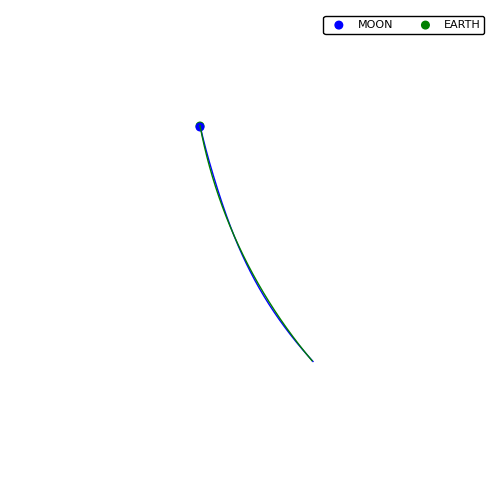

In [8]:
ti = DateTime(2016, 4)
tf = DateTime(2016, 5)
bodies=["Earth", "Moon"]
    
sys = system(ti=ti, tf=tf, bodies=bodies, refFrame="hci")
print()

And some planetary orbits over 2 years (viewing in heliocentric [HCI] frame, more on this later):

/Users/jamesspicer/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x315c045d0>)

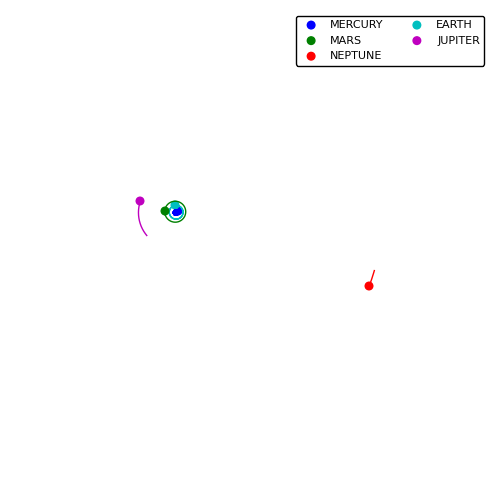

In [3]:
ti = DateTime(2016)
tf = DateTime(2018)
bodies=["Sun", "Earth", "Mercury", "Mars", "Jupiter", "Neptune"]
    
system(ti=ti, tf=tf, bodies=bodies, refFrame="hci")
print()

### 4. Adding Lagrange Points
Just as celestial bodies are added to the `bodies` array, Lagrange points are be added to the `points` array (default `[]`). So far Celeste only has functionality for Earth-Moon and Earth-Sun points, though hopefully this can be expanded for any two bodies soon.

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x3220bcdd0>)

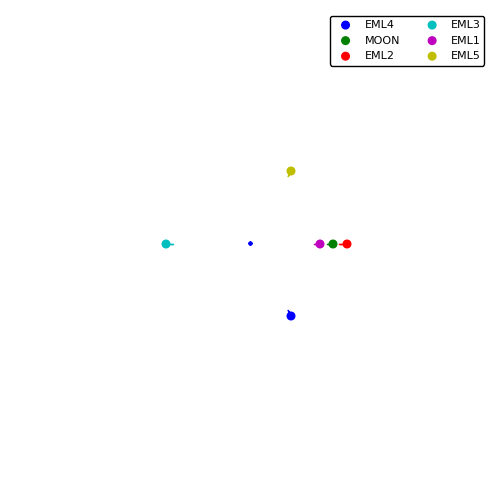

In [5]:
ti = DateTime(2016, 4)
tf = DateTime(2016, 4, 14)
bodies=["Earth", "MOON"]
points=["EML1", "EML2", "EML3", "EML4", "EML5"]
    
system(ti=ti, tf=tf, bodies=bodies, points=points, refFrame="EMsyn")
print()

### 5. Adding Spacecraft
Spacecraft can be added from the Celeste library to one of two categories, 'client' or 'constellation'.

The default Celeste spacecraft library contains up-to-date TLE orbital elements. To update the spacecraft library with the latest TLE information from [Celestrak](https://celestrak.com/), run the following cell (**N.B**. you will lose any custom spacecraft you've previously created and saved):

In [ ]:
updateSCLib()

A list of the spacecraft in the Celeste library can be shown with the `listSC()` function. These are the names that must be used with the `system()` function.

In [25]:
listSC()

ABS-2
ABS-3
ABS-3A
ABS-4(MOBISAT-1)
ABS-6
ABS-7
AFRICASAT-2(MEASAT-2)
AFRISTAR
AGGIESAT4
AGILE
AIM
AKEBONO(EXOS-D)
ALOS-2
ALPHASAT
AMAZONAS1
AMAZONAS2
AMAZONAS3
AMAZONAS4A
AMC-1(GE-1)
AMC-10(GE-10)
AMC-11(GE-11)
AMC-14
AMC-15
AMC-16
AMC-18
AMC-2(GE-2)
AMC-21
AMC-3(GE-3)
AMC-4(GE-4)
AMC-6(GE-6)
AMC-7(GE-7)
AMC-8(GE-8)
AMC-9(GE-12)
AMOS-2
AMOS-3
AMOS-4
AMSC1
ANIKF1
ANIKF1R
ANIKF2
ANIKF3
ANIKG1
APSTAR5(TELSTAR18)
APSTAR6
APSTAR7
APSTAR9
AQUA
ARABSAT-5A
ARABSAT-5C
ARIRANG-2(KOMPSAT-2)
ARIRANG-3(KOMPSAT-3)
ARIRANG-5(KOMPSAT-5)
ARSAT1
ARSAT2
ARTEMIS
ASIASAT3S
ASIASAT4
ASIASAT5
ASIASAT6
ASIASAT7
ASIASAT8
ASIASTAR
ASNARO
ASTRA1D
ASTRA1F
ASTRA1G
ASTRA1H
ASTRA1KR
ASTRA1L
ASTRA1M
ASTRA1N
ASTRA2A
ASTRA2B
ASTRA2C
ASTRA2D
ASTRA2E
ASTRA2F
ASTRA2G
ASTRA3A
ASTRA3B
ASTRA4A(SIRIUS4)
ASTRA5B
ASTROSAT
ATHENA-FIDUS
AUD1
AUD2
AUD3
AURA
AZERSPACE1
BADR-4
BADR-5
BADR-6
BADR-7(ARABSAT-6B)
BADR-B
BEIDOUG1
BEIDOUG3
BEIDOUG4
BEIDOUG5
BEIDOUG6
BEIDOUI1-S
BEIDOUI2-S
BEIDOUIGSO1
BEIDOUIGSO2
BEIDOUIGSO3
BEIDOUIGSO4
BE

Let's use NASA's Solar Dynamics Observatory (`SDO`), the International Space Station (`ISS(ZARYA)`), and `SKYSAT-2` as example of using default spacecraft from the `listSC()` function:

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x31db66910>)

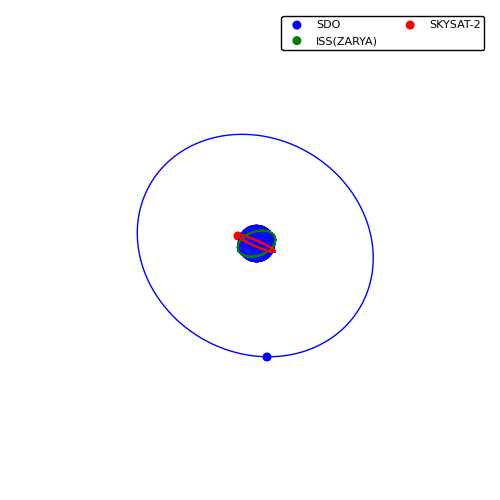

In [24]:
system(clients=["SDO", "ISS(ZARYA)", "SKYSAT-2"])
print()

Custom spacecraft can be added to the Celeste library using the `addSpacecraft()` function (see wiki). 

A few examples:

Let's add a spacecraft that orbits Earth in an equatorial elliptical orbit:

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x318ee0790>)

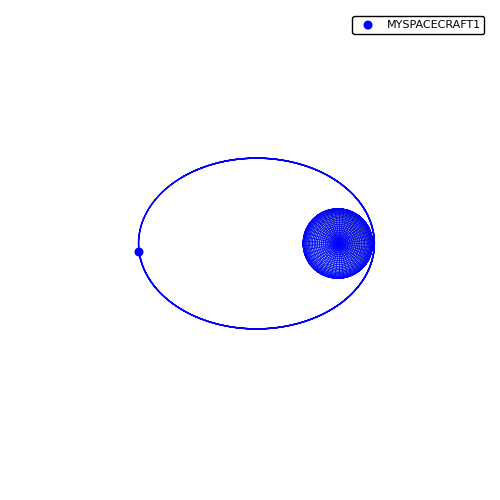

In [9]:
addSpacecraft("mySpacecraft1", ha=30000, hp=300)
system(clients=["mySpacecraft1"])
print()

Next let's add a Martian orbiter in an 30° inclined elliptical orbit (note that angular orbital parameters must be entered in radians):

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x3191a9e10>)

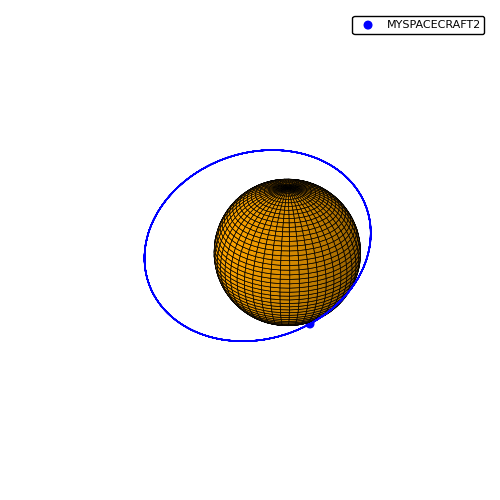

In [10]:
addSpacecraft("mySpacecraft2", center="Mars", e=0.3, a=5500, i=deg2rad(30))
system(clients=["mySpacecraft2"], bodies=["Mars"], view="xyz", refFrame="mci")
print()

### 6. Adding ground stations
Ground stations are added into the `stations` array (default `[]`) using the 3-letter codes described in the wiki constants section. Currently there's no way to add custom ground stations other than to hard-code them into the `constants.jl` script in Celeste.

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x329cab590>)

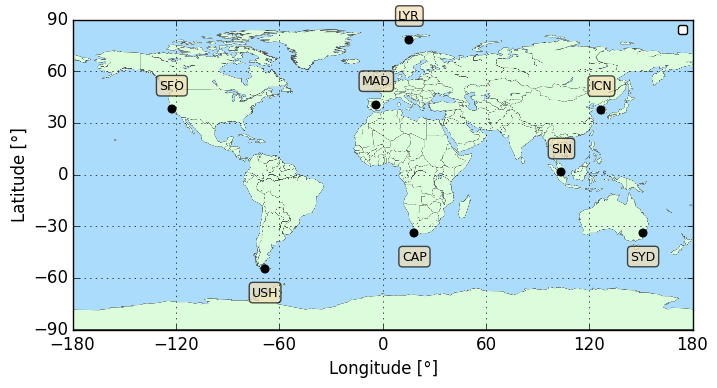

In [29]:
system(stations=["SFO", "LYR", "ICN", "SIN", "USH", "CAP", "MAD", "SYD"], refFrame="gdc")
print()

### 7. Changing reference frames and view angles
Celeste can plot in a number of reference frames (see wiki for full list), which are specified by the `refFrame` arguement. The view angle allows the view of position plots to be specified as top-down (`xy`), side-on (`xz` or `yz`), or trimetric (`xyz`). 

In addition, specifying the `PyguiOn` argument as `true` shows the plot in a pop-out window (that can then be interacted with (panned, zoomed, etc.) using the mouse. A final useful argument is `showGEO`, which can be used to display the geostationary orbit in any plot. 

Here are a few examples of the same simulation in different reference frames and viewpoints:

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x31dd1fdd0>)

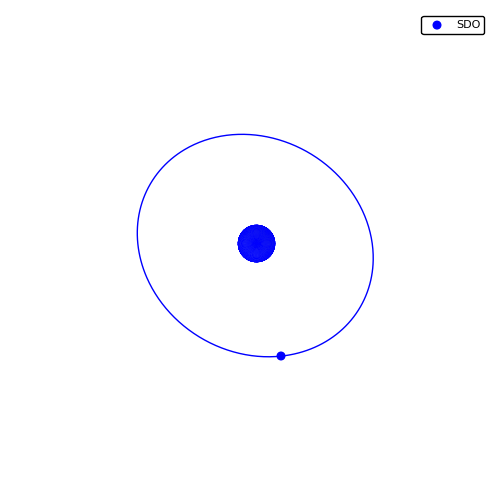

In [43]:
system(clients=["SDO"])
print()

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x31d05ee90>)

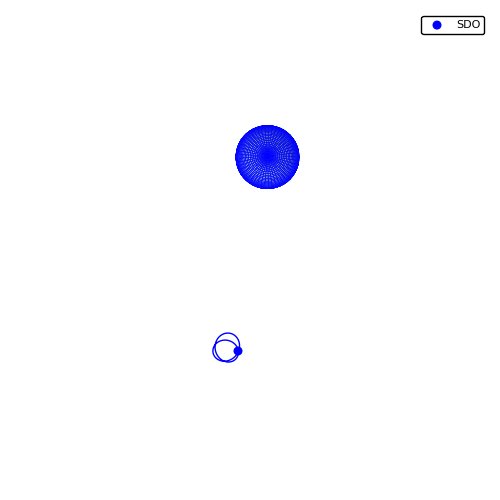

In [35]:
system(clients=["SDO"], refFrame="ecef")
print()

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x32aa37290>)

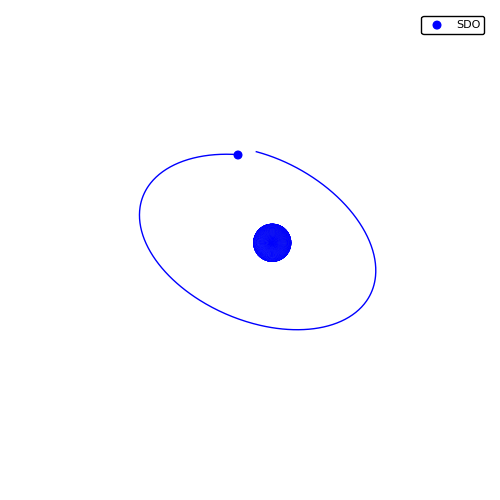

In [37]:
system(clients=["SDO"], refFrame="EMsyn")
print()

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x318e6d250>)

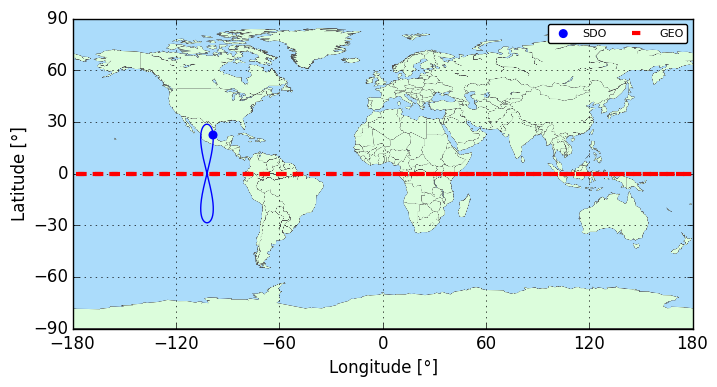

In [5]:
system(clients=["SDO"], refFrame="gdc", showGEO=true)
print()

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x319a8fe90>)

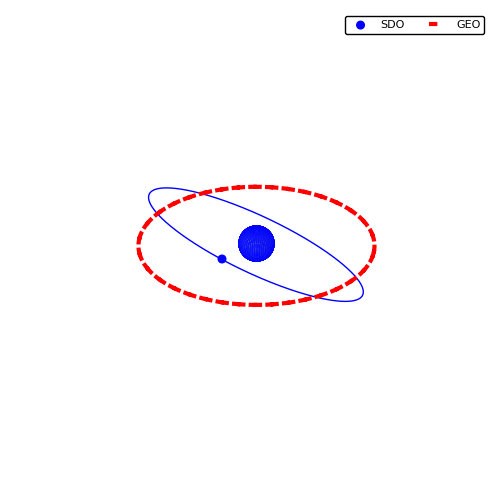

In [44]:
system(clients=["SDO"], view="xyz", showGEO=true, PyguiOn=true)
print()

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x31cdfc1d0>)

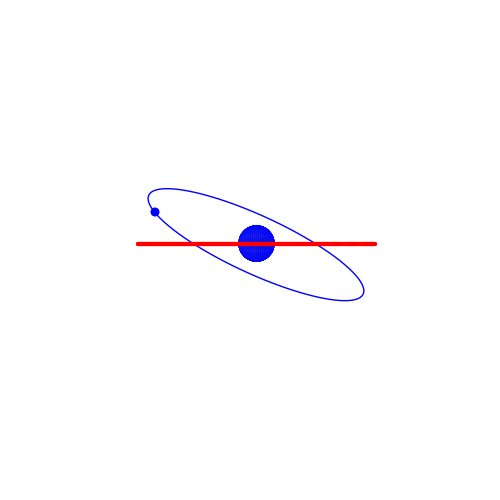

In [72]:
system(clients=["SDO"], view="xz", showGEO=true, showLegend=false)
print()

### 8. Azimuth-Elevation Plots
A special reference frame is the azimuth-elevation plot, specified with `refFrame="aer"`. 

The point on the Earth from which azimuth & elevation are calculated must be specified with the `azElStation` argument (default `["SFO"]`). 

In addition, the az-el plot can be either cartesian or polar, depending on the `AERpolar` argument (defaults=`false`). Once again, the GEO belt can be displayed using the `showGEO` argument.

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x31f5ecc10>)

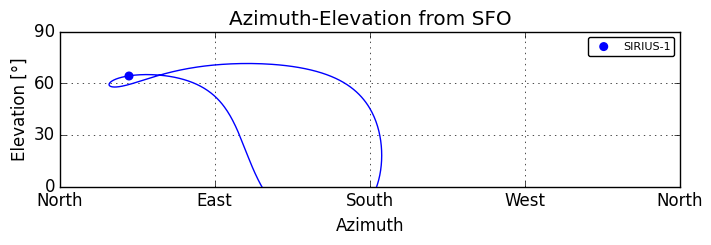

In [49]:
system(clients=["SIRIUS-1"], refFrame="aer")
print()

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x31da30110>)

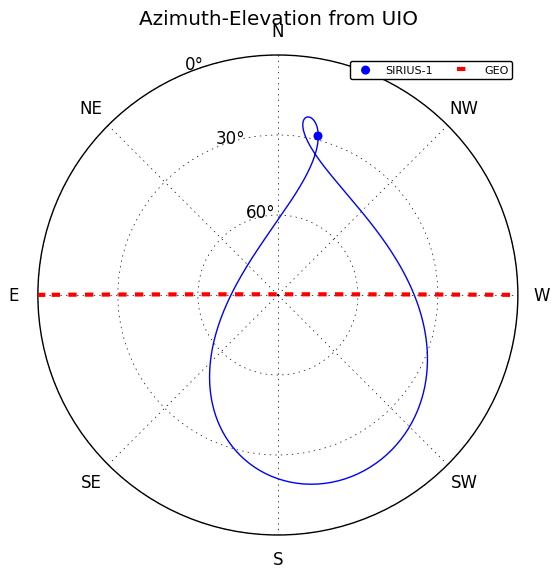

In [50]:
system(clients=["SIRIUS-1"], refFrame="aer", azElStation=["UIO"], AERpolar=true, showGEO=true)
print()

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x31d009350>)

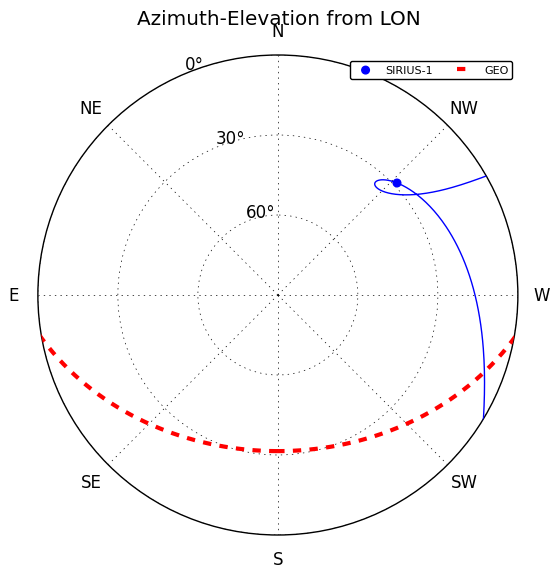

In [54]:
system(clients=["SIRIUS-1"], refFrame="aer", azElStation=["LON"], AERpolar=true, showGEO=true)
print()

### 9. Adding antennas
The `addAntenna()` function is a powerful capability that allows RF sensors to simulation objects. These sensors can interact with each other and allow for data rate analysis, etc. 

When adding an antenna, the 'parent' object (e.g. `"ISS(ZARYA)"` must be specified, as well as the 'type' of target (e.g. `"constellation"`, or `"station"`.

**N.B.** Two antennas won't interact with each other unless they're on the same frequency and have line-of-sight. The receive antenna must have no transmit power specified.

Example: Add antennas to the International Space Station and White Sands Ground Station, and plot the resulting downlink data rates at 28 GHz:

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x0000000026E11E48>)

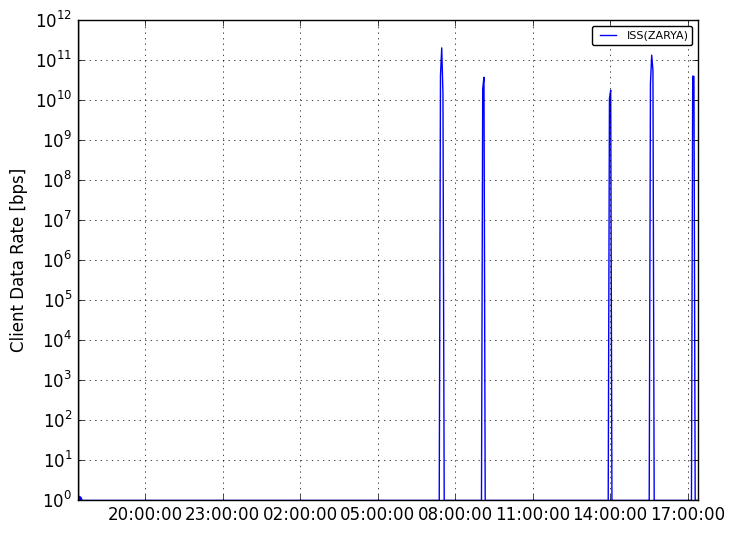

In [3]:
addAntenna("ISS(ZARYA)", "station", G=30, P_dBW=10, f=28e9) # Tx
addAntenna("ALM", "client", GT=24, f=28e9) # Rx

sys = system(stations=["ALM"], clients=["ISS(ZARYA)"], plot=["clientRates"])
print()

Antennas can also be used to form link chains by adding constellation spacecraft that have both client-pointing and station-pointing antennas.

Example: Using ISS with TDRSS relay spacecraft along with ground stations in White Sands and Guam. 

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x00000000270172B0>)

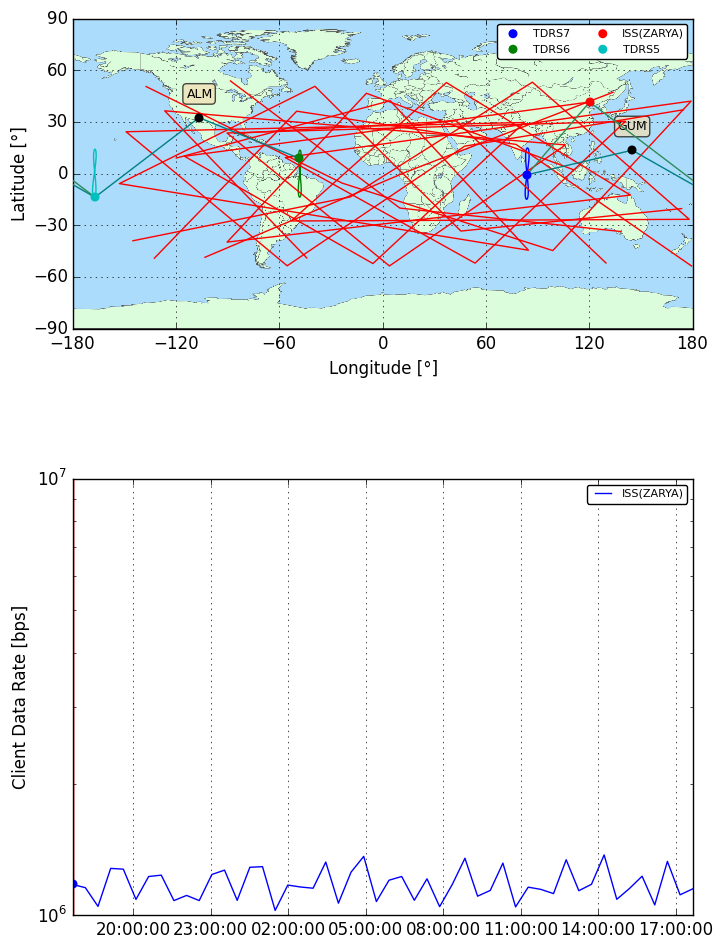

In [2]:
addAntenna("ISS(ZARYA)", "constellation", G=10, P_dBW=15, f=23e9) # Tx

addAntenna("ALM", "constellation", GT=30, f=28e9) # Rx
addAntenna("GUM", "constellation", GT=30, f=28e9) # Rx

constellation = AbstractString[]
for i in [5, 6, 7]
    name = "TDRS"*string(i)
    addAntenna(name, "client", GT=20, f=23e9) # Rx
    addAntenna(name, "station", G=45, P_dBW=50, f=28e9) # Tx
    push!(constellation, name)
end

system(tSteps=50, stations=["GUM","ALM"], clients=["ISS(ZARYA)"], constellation=constellation, refFrame="gdc", plot=["position", "clientRates"])
print()

### 10. Different plot types
Although the default plot type is `plot="position"`, as the examples above show there are other plots that can be add to the `plot` array. Examples are ranges between objects (`"range"`), link atmospheric losses (`"atmoLoss"`), link path losses (`"pathLoss"`). Legends can also be toggled on and off with the `showLegend` argument (default `true`):

HDF5-DIAG: Error detected in HDF5 (1.8.15-patch1) thread 0:
  #000: H5O.c line 246 in H5Oopen(): unable to open object
    major: Symbol table
    minor: Can't open object
  #001: H5O.c line 1357 in H5O_open_name(): object not found
    major: Symbol table
    minor: Object not found
  #002: H5Gloc.c line 430 in H5G_loc_find(): can't find object
    major: Symbol table
    minor: Object not found
  #003: H5Gtraverse.c line 861 in H5G_traverse(): internal path traversal failed
    major: Symbol table
    minor: Object not found
  #004: H5Gtraverse.c line 641 in H5G_traverse_real(): traversal operator failed
    major: Symbol table
    minor: Callback failed
  #005: H5Gloc.c line 385 in H5G_loc_find_cb(): object 'ALM' doesn't exist
    major: Symbol table
    minor: Object not found


PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x319e4e050>)

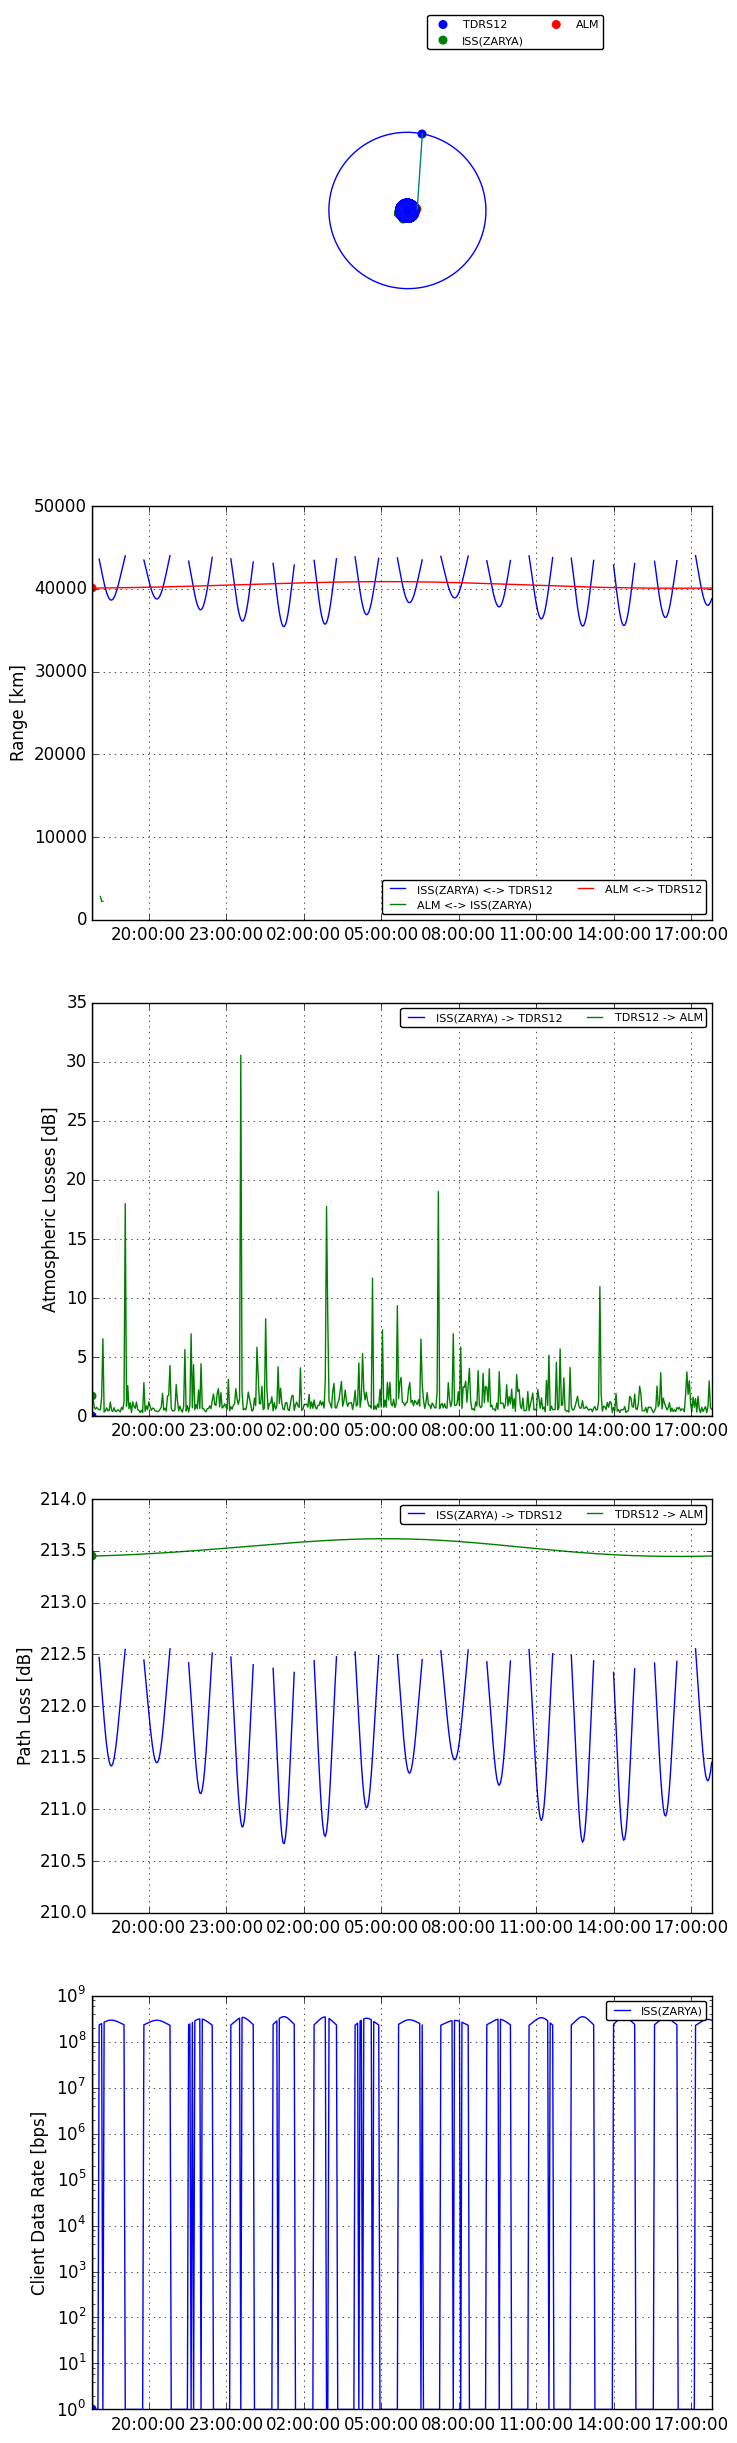

In [4]:
addAntenna("ISS(ZARYA)", "constellation", G=30, P_dBW=15, f=23e9) # Tx
addAntenna("ALM", "constellation", GT=24, f=28e9) # Rx
addAntenna("TDRS12", "client", GT=24, f=23e9) # Rx
addAntenna("TDRS12", "station", G=30, P_dBW=15, f=28e9) # Tx

system(stations=["ALM"], clients=["ISS(ZARYA)"], constellation=["TDRS12"], plot=["position", "range", "atmoLoss", "pathLoss", "clientRates"])
print()

### 11. Custom manipulations using `sys`

The `system()` function doesn't just perform calculations, it also returns the whole simulation as a Julia [dictionary](https://en.wikibooks.org/wiki/Introducing_Julia/Dictionaries_and_sets) so that you can run custom operations on it (also useful for debugging). Each object in the simulation is also its own dictionary, with keys like `"coords"`, `"frame"`, `"type"`, etc.

Example: Plot the *x*-coordinate of the ISS against time.

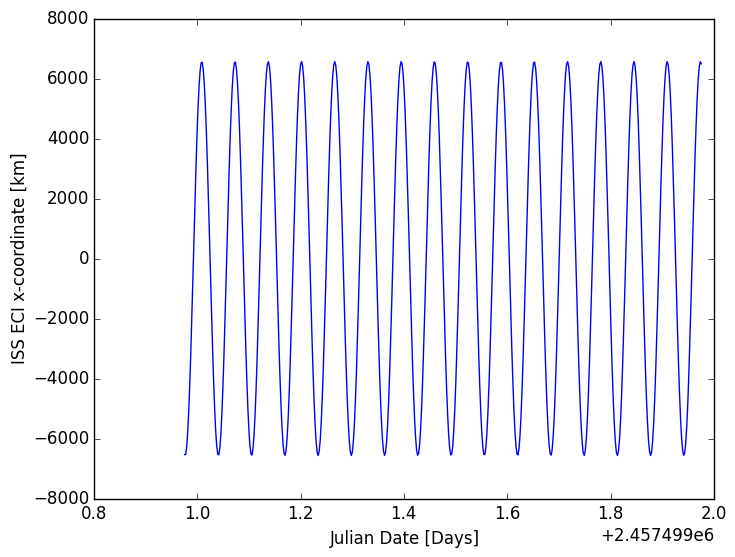

PyObject <matplotlib.text.Text object at 0x31958a7d0>

In [8]:
sys = system(clients=["ISS(ZARYA)"], plot=[])
x = sys["t"]
y = sys["ISS(ZARYA)"]["coords"][:,1]
plot(x,y)
xlabel("Julian Date [Days]")
ylabel("ISS ECI x-coordinate [km]")

In [ ]:
#### Your Turn: